In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [5]:
df.replace('?', np.nan, inplace= True)
df = df.astype({'age': np.float64, 'fare': np.float64})

In [6]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

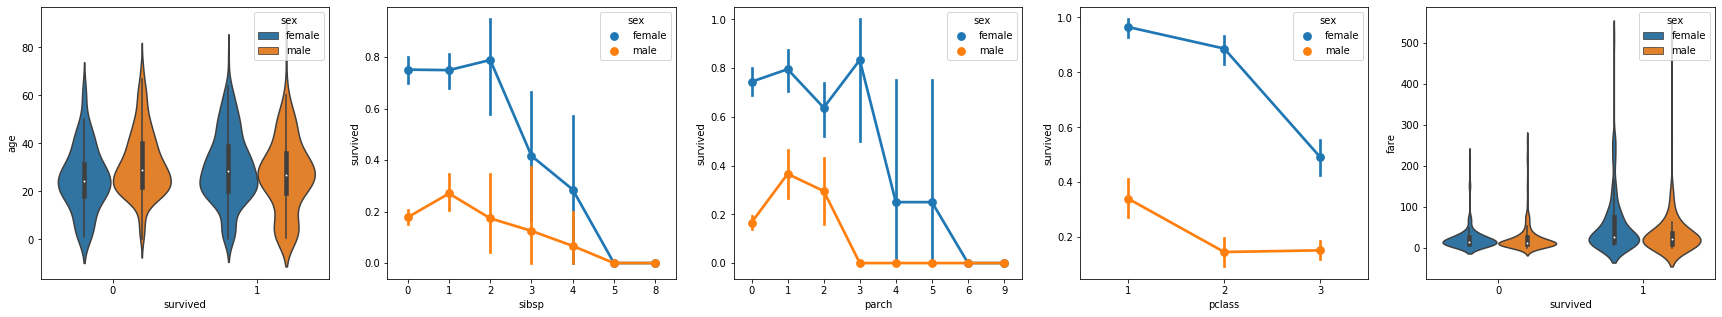

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=df, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=df, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=df, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=df, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=df, ax=axs[4])

In [9]:
df.replace({'male':1, 'female':0}, inplace=True)

In [10]:
df.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [12]:
df['relatives'] = df.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
df.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [13]:
df = df[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [15]:
from bs4 import BeautifulSoup